# Importing Python libraries

In [1]:
import math
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.utils import check_array
from datetime import datetime


import seaborn as sns 
import missingno as msno
import matplotlib.pyplot as plt


from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential



from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error


import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------

# Loading dataset

In [2]:
data = pd.read_csv('DIS.csv') 
data=data[['Date','Open','High','Low','Close','Volume']]

In [3]:
data

,Date,Open,High,Low,Close,Volume
0,1962-01-02,0.092908,0.096026,0.092908,0.092908,817400
1,1962-01-03,0.092908,0.094467,0.092908,0.094155,778500
2,1962-01-04,0.094155,0.094467,0.093532,0.094155,934200
3,1962-01-05,0.094155,0.094779,0.093844,0.094467,934200
4,1962-01-08,0.094467,0.095714,0.092285,0.094155,1245600
...,...,...,...,...,...,...
14703,2020-06-01,117.260002,119.650002,116.930000,118.769997,10538300
14704,2020-06-02,119.000000,119.849998,117.830002,118.750000,10753100
14705,2020-06-03,119.989998,122.449997,119.320000,122.180000,12584300
14706,2020-06-04,121.949997,124.500000,121.849998,123.690002,14188700


# ------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------

# Exploratory data analysis

# Five top records of data

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1962-01-02,0.092908,0.096026,0.092908,0.092908,817400
1,1962-01-03,0.092908,0.094467,0.092908,0.094155,778500
2,1962-01-04,0.094155,0.094467,0.093532,0.094155,934200
3,1962-01-05,0.094155,0.094779,0.093844,0.094467,934200
4,1962-01-08,0.094467,0.095714,0.092285,0.094155,1245600


# Five last records of data

In [5]:
data.tail()

,Date,Open,High,Low,Close,Volume
14703,2020-06-01,117.260002,119.650002,116.930000,118.769997,10538300
14704,2020-06-02,119.000000,119.849998,117.830002,118.750000,10753100
14705,2020-06-03,119.989998,122.449997,119.320000,122.180000,12584300
14706,2020-06-04,121.949997,124.500000,121.849998,123.690002,14188700
14707,2020-06-05,126.309998,127.820000,124.279999,124.820000,15238747


# Coloumns/features in data

In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

# Length of data

In [7]:
print('lenght of data is', len(data))

lenght of data is 14708


# Shape of data

In [8]:
data.shape

(14708, 6)

# Data information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14708 entries, 0 to 14707
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    14708 non-null  object 
 1   Open    14708 non-null  float64
 2   High    14708 non-null  float64
 3   Low     14708 non-null  float64
 4   Close   14708 non-null  float64
 5   Volume  14708 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 689.6+ KB


# Data types of all coloumns

In [10]:
data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

# Looking at Missing values (white lines in each box of columns shows the misisng values)

<AxesSubplot:>

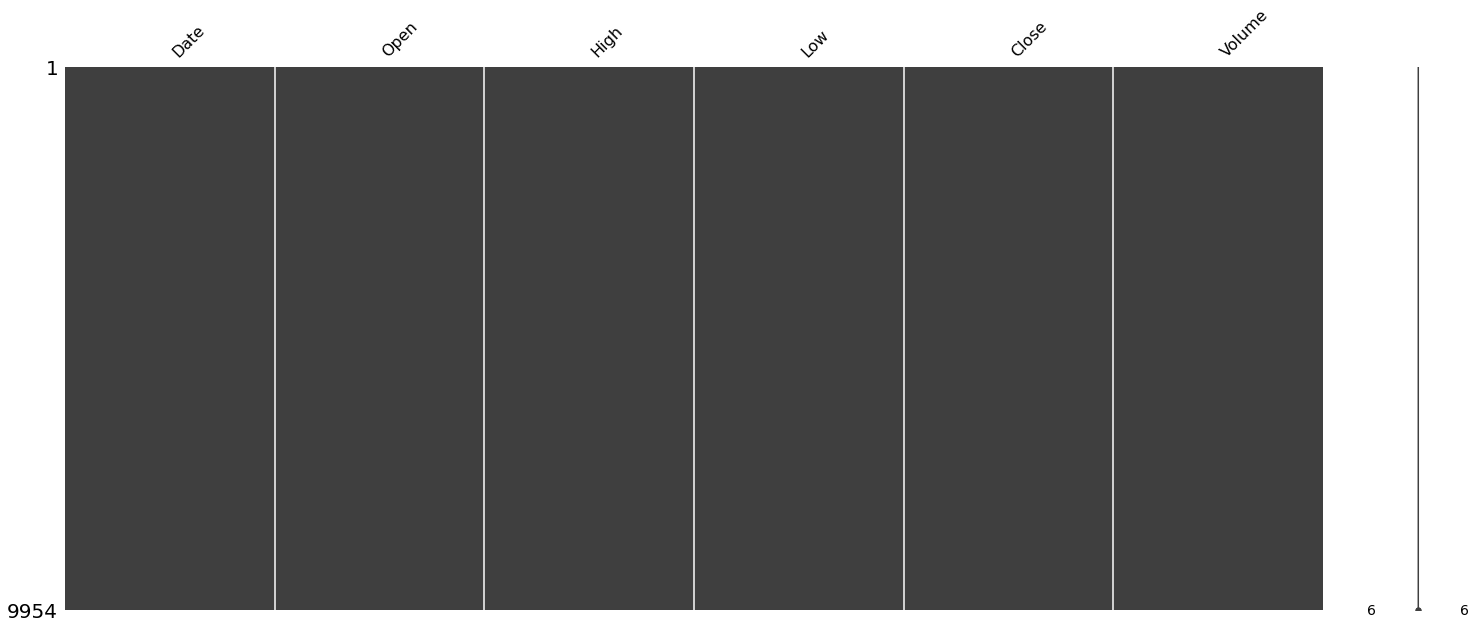

In [11]:
msno.matrix(data.sample(9954))

# Checking missing Values

In [12]:
data[data.isnull().any(axis=1)].head()

,Date,Open,High,Low,Close,Volume


# Count of missing values

In [13]:
np.sum(data.isnull().any(axis=0))

0

# Is there any missing values?

In [14]:
data.isnull().values.any()

False

# Counts of missing values in each column

In [15]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Data Description

In [16]:
data.describe()

,Open,High,Low,Close,Volume
count,14708.000000,14708.000000,14708.000000,14708.000000,1.470800e+04
mean,23.369014,23.592243,23.132185,23.370529,6.064233e+06
std,33.050287,33.301329,32.760398,33.037831,6.216978e+06
min,0.054560,0.054872,0.052378,0.053625,3.890000e+04
25%,0.986500,0.999345,0.976224,0.986500,2.414275e+06
50%,9.762239,9.854724,9.659479,9.772515,4.834350e+06
75%,30.376801,30.812065,29.904962,30.394682,7.850425e+06
max,152.940002,153.410004,151.149994,151.639999,2.058672e+08


# Comparison of open and close columns with values

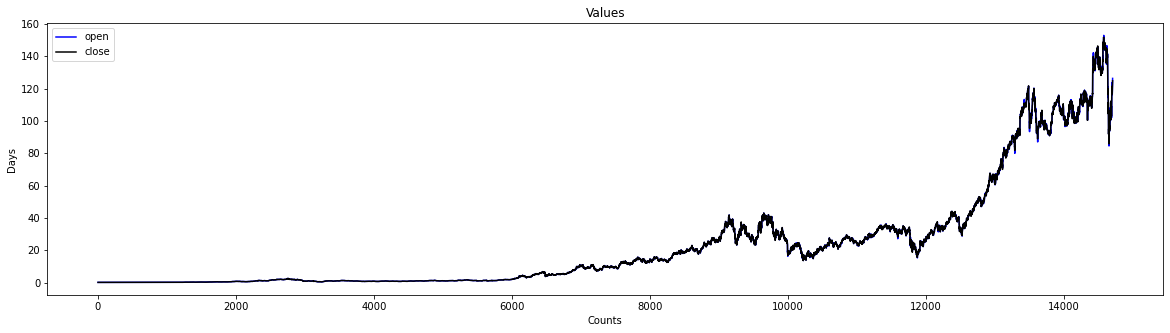

In [17]:
plt.figure(figsize=(20, 5))
plt.subplot(1,1,1)
plt.plot(data['Open'].values,color='blue',label='open')
plt.plot(data['Close'].values,color='black',label='close')

plt.title('Values')
plt.xlabel('Counts')
plt.ylabel('Days')
plt.legend(loc='best')
plt.show()

# Comparison of high and low columns with values

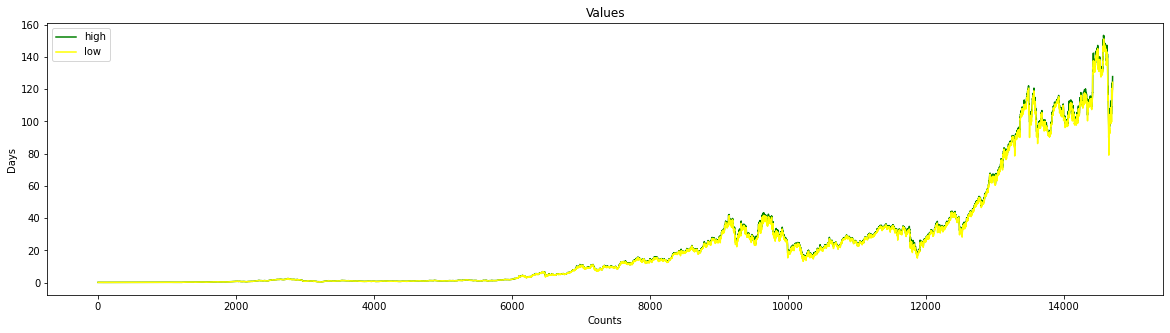

In [18]:
plt.figure(figsize=(20, 5))
plt.subplot(1,1,1)
plt.plot(data['High'].values,color='green',label='high')
plt.plot(data['Low'].values,color='yellow',label='low')


plt.title('Values')
plt.xlabel('Counts')
plt.ylabel('Days')
plt.legend(loc='best')
plt.show()

# Comparison of open, high, low, close columns with values

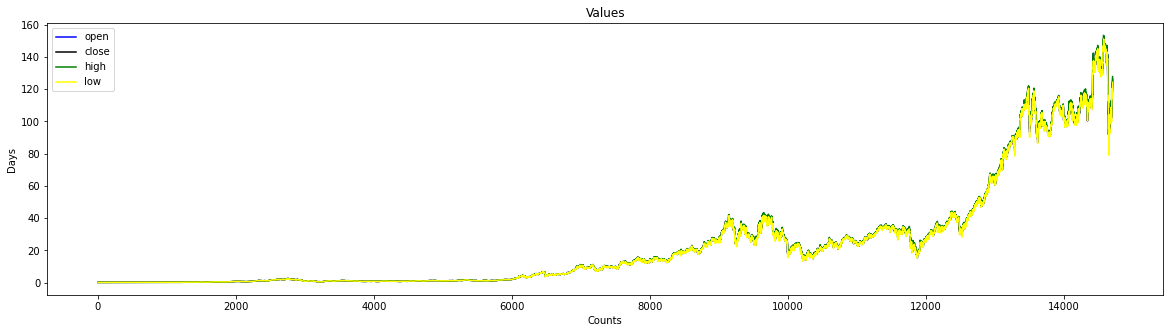

In [19]:
plt.figure(figsize=(20, 5))
plt.subplot(1,1,1)
plt.plot(data['Open'].values,color='blue',label='open')
plt.plot(data['Close'].values,color='black',label='close')
plt.plot(data['High'].values,color='green',label='high')
plt.plot(data['Low'].values,color='yellow',label='low')

plt.title('Values')
plt.xlabel('Counts')
plt.ylabel('Days')
plt.legend(loc='best')
plt.show()

# Counts Distribution of top 10 Open

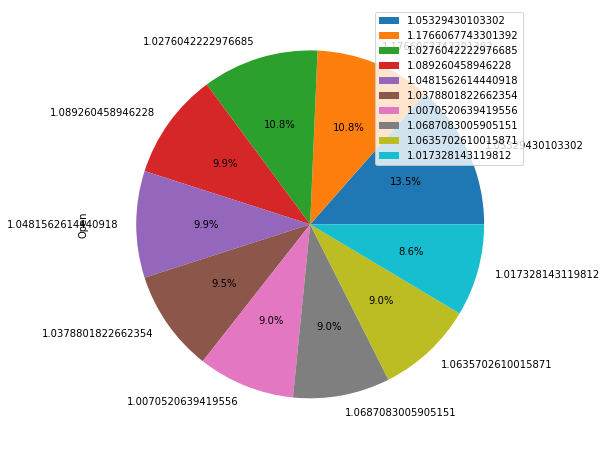

In [20]:
data["Open"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

# Counts Distribution of top 10 High

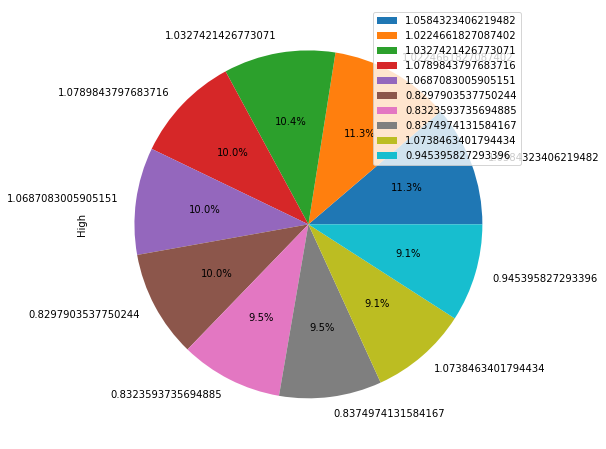

In [21]:
data["High"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

# Counts Distribution of top 10 Low

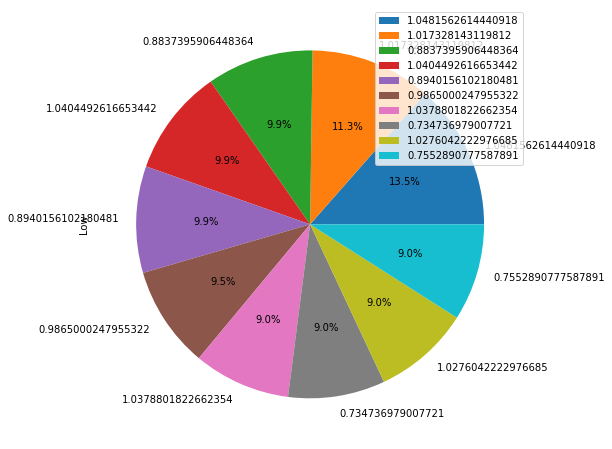

In [22]:
data["Low"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

# Counts Distribution of top 10 Close

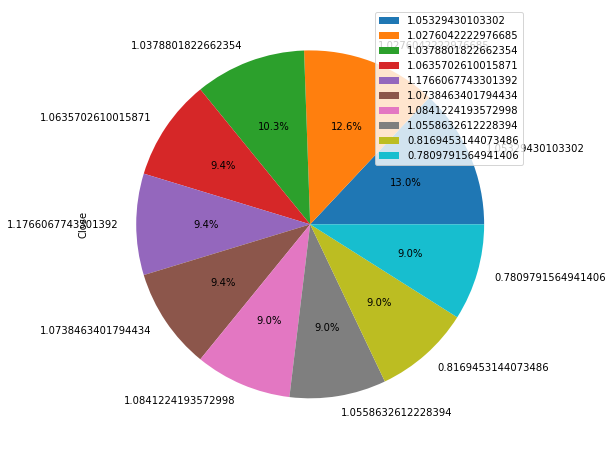

In [23]:
data["Close"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

# Hitogram of all columns where we are going to check that how the values of each column distributed with their counts

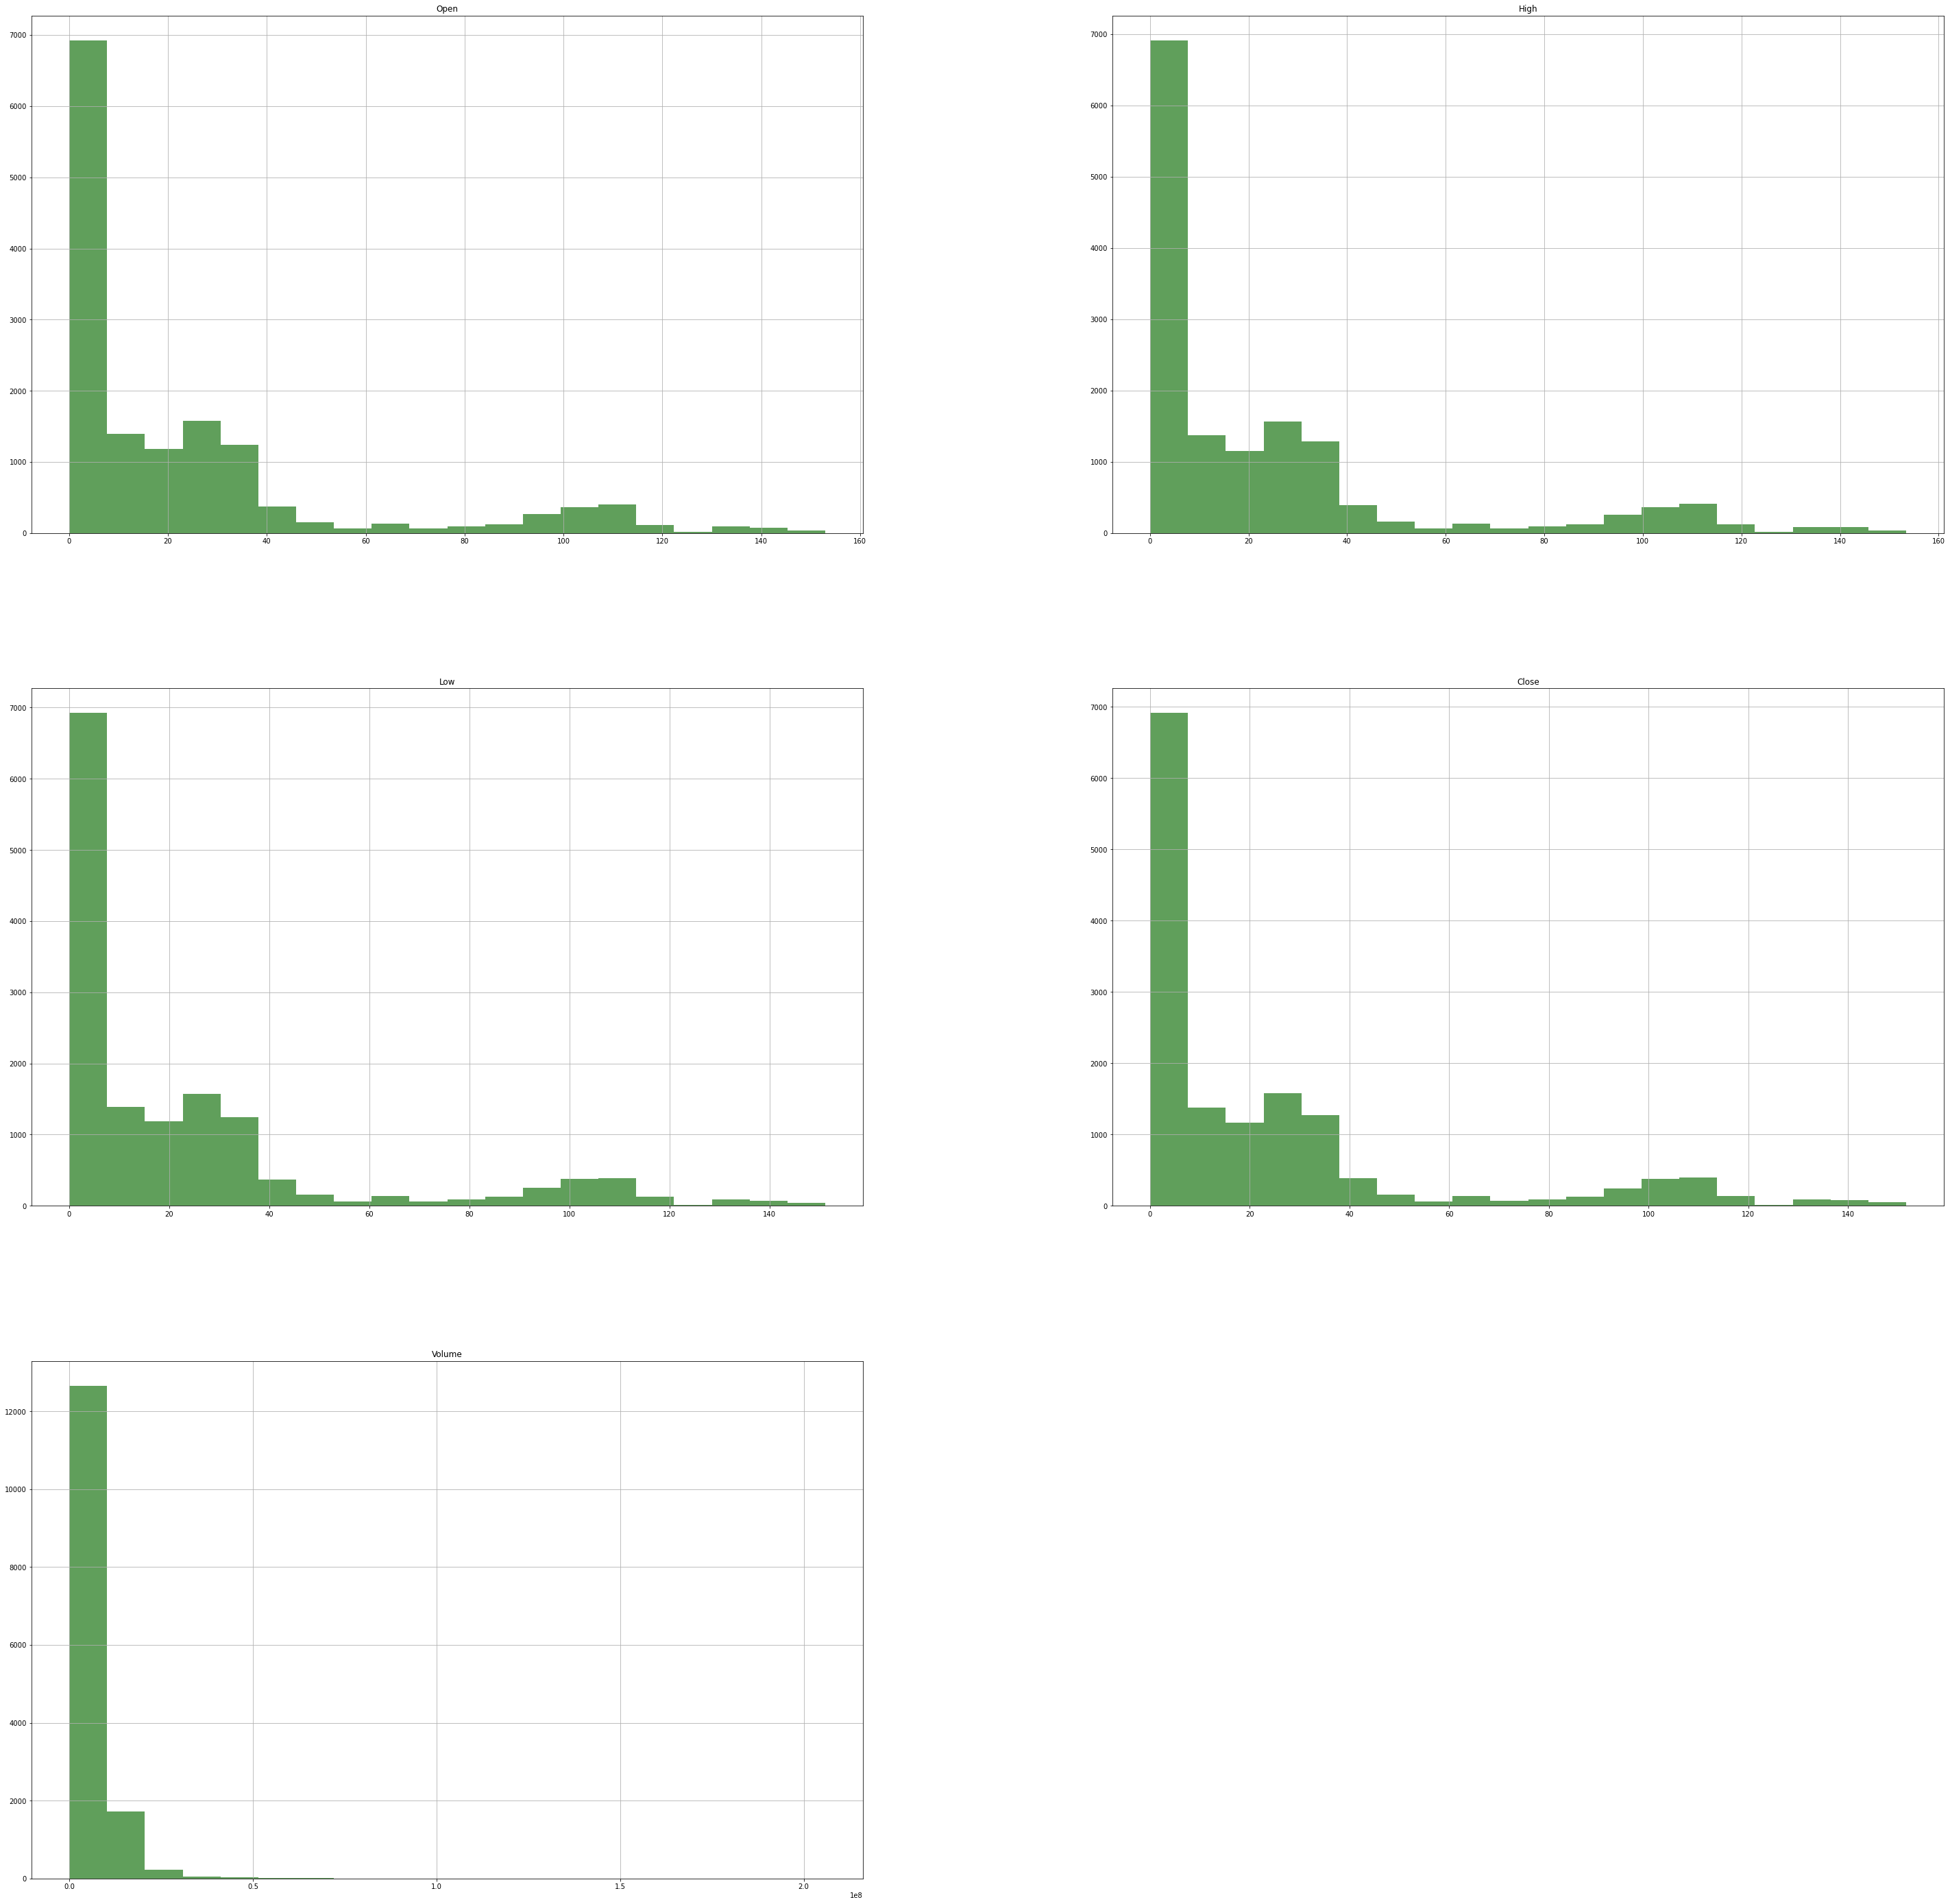

In [24]:
data.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Features/Columns Distribution with values counts")
plt.show()

# A heat map for graphical representation of data where the pairs of the coulmns contained in a matrix are represented as colors. The heat map is showing the correlation between the columns, represented by the colurs 

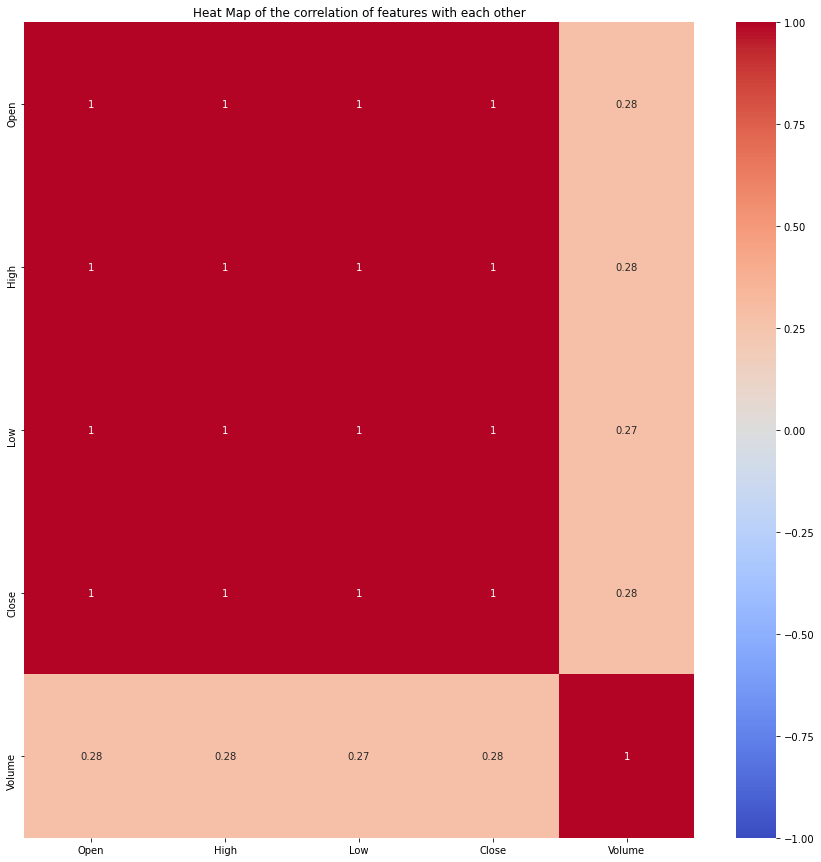

In [25]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title("Heat Map of the correlation of features with each other")
plt.show()

# ------------------------------------------------------------------------------------------------------

# ----------------Machine Learning Algorithm and Evaluation-----------------------

# ------------------------------------------------------------------------------------------------------

# As we analysed all that all the columns of high, low,close and open are going around same so Close is selected for the predictions

# By getting features and Class

In [26]:
y=data['Close']
X=data.drop(columns=['Close','Date'])

# ------------------------------------------------------------------------------------------------------

# Random Forest  Regressor Algorithm

# Tuning parameters

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='mse', n_estimators=100, min_samples_split=2, min_samples_leaf=2, n_jobs=None)

# Cross validation and evaluation of trained model

In [28]:
x=np.array(X)
y=y.ravel()
kf = KFold(n_splits=5)
outcomes2 = []
ClassR=0
ConM=0
fold = 0
i=0
conf_matrix_list_of_arrays = []
for train_index, test_index in kf.split(x,y):
    i=i+1
    print('\n')
    print("Cross validation",i)
    fold += 1
    Xtrain, Xtest = x[train_index], x[test_index]
    ytrain, y_test = y[train_index], y[test_index]
    rf.fit(Xtrain, ytrain)
    y_pred = rf.predict(Xtest)
    rs=r2_score(y_test,y_pred)
    print('R Squared : ', rs)
    MAE=median_absolute_error(y_test,y_pred)
    print('Mean Absolute error: ', MAE)
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared error: ', mse)
    rmse = math.sqrt(mse)
    print('Root mean squared error: ', rmse)
    y_test=np.array(y_test)
    y_test=y_test.reshape(-1, 1)
    y_pred=y_pred.reshape(-1, 1)
    def mean_absolute_percentage_error(y_test, y_pred): 
        mask = y_test != 0
        return (np.fabs(y_test - y_pred)/y_test)[mask].mean()
    mape=mean_absolute_percentage_error(y_test,y_pred)
    print('Mean absolute percentage error: ', mape)



Cross validation 1
R Squared :  0.9149388470365193
Mean Absolute error:  0.12195303745449526
Mean Squared error:  0.03300553116421703
Root mean squared error:  0.18167424463642892
Mean absolute percentage error:  1.1690676885219327


Cross validation 2
R Squared :  0.9977961415777903
Mean Absolute error:  0.0066692573719082104
Mean Squared error:  0.0001369753947759924
Root mean squared error:  0.011703648780444173
Mean absolute percentage error:  0.00889549260104763


Cross validation 3
R Squared :  0.7742346941473751
Mean Absolute error:  1.6210726047498834
Mean Squared error:  7.211852127442364
Root mean squared error:  2.685489178425853
Mean absolute percentage error:  0.2665086044250515


Cross validation 4
R Squared :  0.9978101828061814
Mean Absolute error:  0.1530264031546551
Mean Squared error:  0.078923447605173
Root mean squared error:  0.2809331728457375
Mean absolute percentage error:  0.007413685797383075


Cross validation 5
R Squared :  -0.8931297406236081
Mean Absolu

# XGB  Regressor Algorithm

# Tuning parameters

In [29]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(base_score=0.5,n_estimators=100, n_jobs=1, verbosity=1)

# Cross validation and evaluation of trained model

In [30]:
x=np.array(X)
y=y.ravel()
kf = KFold(n_splits=5)
outcomes2 = []
ClassR=0
ConM=0
fold = 0
i=0
conf_matrix_list_of_arrays = []
for train_index, test_index in kf.split(x,y):
    i=i+1
    print('\n')
    print("Cross validation",i)
    fold += 1
    Xtrain, Xtest = x[train_index], x[test_index]
    ytrain, y_test = y[train_index], y[test_index]
    xgb.fit(Xtrain, ytrain)
    y_pred = xgb.predict(Xtest)
    rs=r2_score(y_test,y_pred)
    print('R Squared : ', rs)
    MAE=median_absolute_error(y_test,y_pred)
    print('Mean Absolute error: ', MAE)
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared error: ', mse)
    rmse = math.sqrt(mse)
    print('Root mean squared error: ', rmse)
    y_test=np.array(y_test)
    y_test=y_test.reshape(-1, 1)
    y_pred=y_pred.reshape(-1, 1)
    def mean_absolute_percentage_error(y_test, y_pred): 
        mask = y_test != 0
        return (np.fabs(y_test - y_pred)/y_test)[mask].mean()
    mape=mean_absolute_percentage_error(y_test,y_pred)
    print('Mean absolute percentage error: ', mape)



Cross validation 1
R Squared :  0.8928951101072389
Mean Absolute error:  0.15299709141254425
Mean Squared error:  0.04155896855422667
Root mean squared error:  0.20386016912145116
Mean absolute percentage error:  1.3062008424729323


Cross validation 2
R Squared :  0.9711292894330653
Mean Absolute error:  0.02489018440246582
Mean Squared error:  0.0017943879414015367
Root mean squared error:  0.04236021649379919
Mean absolute percentage error:  0.03323151004214958


Cross validation 3
R Squared :  0.8029176482136555
Mean Absolute error:  1.3370418548583984
Mean Squared error:  6.295603182446059
Root mean squared error:  2.5091040597085765
Mean absolute percentage error:  0.2534933883577838


Cross validation 4
R Squared :  0.9961351902195703
Mean Absolute error:  0.21967315673828125
Mean Squared error:  0.1392920436786796
Root mean squared error:  0.37321849321634587
Mean absolute percentage error:  0.010272572102267457


Cross validation 5
R Squared :  -0.8957992830987873
Mean Absol

# Linear  Regressor Algorithm

# Tuning parameters

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Cross validation and evaluation of trained model

In [32]:
x=np.array(X)
y=y.ravel()
kf = KFold(n_splits=5)
outcomes2 = []
ClassR=0
ConM=0
fold = 0
i=0
conf_matrix_list_of_arrays = []
for train_index, test_index in kf.split(x,y):
    i=i+1
    print('\n')
    print("Cross validation",i)
    fold += 1
    Xtrain, Xtest = x[train_index], x[test_index]
    ytrain, y_test = y[train_index], y[test_index]
    lr.fit(Xtrain, ytrain)
    y_pred = lr.predict(Xtest)
    rs=r2_score(y_test,y_pred)
    print('R Squared : ', rs)
    MAE=median_absolute_error(y_test,y_pred)
    print('Mean Absolute error: ', MAE)
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared error: ', mse)
    rmse = math.sqrt(mse)
    print('Root mean squared error: ', rmse)
    y_test=np.array(y_test)
    y_test=y_test.reshape(-1, 1)
    y_pred=y_pred.reshape(-1, 1)
    def mean_absolute_percentage_error(y_test, y_pred): 
        mask = y_test != 0
        return (np.fabs(y_test - y_pred)/y_test)[mask].mean()
    mape=mean_absolute_percentage_error(y_test,y_pred)
    print('Mean absolute percentage error: ', mape)



Cross validation 1
R Squared :  0.9998365311501909
Mean Absolute error:  0.004360349497217378
Mean Squared error:  6.342938026094355e-05
Root mean squared error:  0.00796425641607197
Mean absolute percentage error:  0.022663056086266314


Cross validation 2
R Squared :  0.9974931617631426
Mean Absolute error:  0.006253864028055334
Mean Squared error:  0.00015580635928001267
Root mean squared error:  0.012482241756992718
Mean absolute percentage error:  0.0083433040591425


Cross validation 3
R Squared :  0.9998037462047489
Mean Absolute error:  0.03525726347655933
Mean Squared error:  0.006269135753409527
Root mean squared error:  0.07917787414050421
Mean absolute percentage error:  0.005266157580702067


Cross validation 4
R Squared :  0.9984020996133154
Mean Absolute error:  0.11762997261071817
Mean Squared error:  0.05759010743123913
Root mean squared error:  0.23997938959677168
Mean absolute percentage error:  0.006009766952220391


Cross validation 5
R Squared :  0.9998289500584

# PLS Algorithm

# Tuning parameters

In [33]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(max_iter=100)

# Cross validation and evaluation of trained model

In [34]:
x=np.array(X)
y=y.ravel()
kf = KFold(n_splits=5)
outcomes2 = []
ClassR=0
ConM=0
fold = 0
i=0
conf_matrix_list_of_arrays = []
for train_index, test_index in kf.split(x,y):
    i=i+1
    print('\n')
    print("Cross validation",i)
    fold += 1
    Xtrain, Xtest = x[train_index], x[test_index]
    ytrain, y_test = y[train_index], y[test_index]
    pls.fit(Xtrain, ytrain)
    y_pred = pls.predict(Xtest)
    rs=r2_score(y_test,y_pred)
    print('R Squared : ', rs)
    MAE=median_absolute_error(y_test,y_pred)
    print('Mean Absolute error: ', MAE)
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared error: ', mse)
    rmse = math.sqrt(mse)
    print('Root mean squared error: ', rmse)
    y_test=np.array(y_test)
    y_test=y_test.reshape(-1, 1)
    y_pred=y_pred.reshape(-1, 1)
    def mean_absolute_percentage_error(y_test, y_pred): 
        mask = y_test != 0
        return (np.fabs(y_test - y_pred)/y_test)[mask].mean()
    mape=mean_absolute_percentage_error(y_test,y_pred)
    print('Mean absolute percentage error: ', mape)



Cross validation 1
R Squared :  0.999668867652754
Mean Absolute error:  0.002631428039007816
Mean Squared error:  0.0001284863727535196
Root mean squared error:  0.01133518296074305
Mean absolute percentage error:  0.013605182963621535


Cross validation 2
R Squared :  0.986190014785616
Mean Absolute error:  0.008875543537939734
Mean Squared error:  0.0008583256335923075
Root mean squared error:  0.029297194978227994
Mean absolute percentage error:  0.014505966862906386


Cross validation 3
R Squared :  0.9996344679716915
Mean Absolute error:  0.04919515133910268
Mean Squared error:  0.011676563527107657
Root mean squared error:  0.10805814882325006
Mean absolute percentage error:  0.007375847696890588


Cross validation 4
R Squared :  0.9969927725957981
Mean Absolute error:  0.18090088626058431
Mean Squared error:  0.10838382086976729
Root mean squared error:  0.3292169814419774
Mean absolute percentage error:  0.008745817258026214


Cross validation 5
R Squared :  0.999656680891064

# Neural netwroks model

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X1 = scaler.fit_transform(X)

In [36]:
X1=np.array(X1)
X1 = np.reshape(X1, (X1.shape[0], X1.shape[1], 1))
y=np.array(y)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30)

# Nueral networks model

In [38]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 4, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 4, 50)             20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [39]:
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

history=regressor.fit(X_train, y_train, epochs=90, batch_size=32)

Epoch 1/90
322/322 [==============================] - 2s 6ms/step - loss: 1070.2504
Epoch 2/90
322/322 [==============================] - 2s 6ms/step - loss: 694.2241
Epoch 3/90
322/322 [==============================] - 2s 6ms/step - loss: 463.5466
Epoch 4/90
322/322 [==============================] - 2s 6ms/step - loss: 289.2062
Epoch 5/90
322/322 [==============================] - 2s 6ms/step - loss: 167.3220
Epoch 6/90
322/322 [==============================] - 2s 5ms/step - loss: 86.2207
Epoch 7/90
322/322 [==============================] - 2s 6ms/step - loss: 44.8950
Epoch 8/90
322/322 [==============================] - 2s 6ms/step - loss: 27.6410
Epoch 9/90
322/322 [==============================] - 2s 5ms/step - loss: 21.6048
Epoch 10/90
322/322 [==============================] - 2s 6ms/step - loss: 19.5765
Epoch 11/90
322/322 [==============================] - 2s 5ms/step - loss: 16.2106
Epoch 12/90
322/322 [==============================] - 2s 6ms/step - loss: 14.8921
Epoch 1

# Evaluation of trained neural networks model

In [40]:
y_pred = regressor.predict(X_test)
rs=r2_score(y_test,y_pred)
print('R Squared : ', rs)
MAE=median_absolute_error(y_test,y_pred)
print('Mean Absolute error: ', MAE)
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error: ', mse)
rmse = math.sqrt(mse)
print('Root mean squared error: ', rmse)
y_test_1=np.array(y_test)
y_test_1=y_test_1.reshape(-1, 1)
y_pred=y_pred.reshape(-1, 1)
def mean_absolute_percentage_error(y_test_1, y_pred): 
    mask = y_test != 0
    return (np.fabs(y_test_1 - y_pred)/y_test_1)[mask].mean()
mape=mean_absolute_percentage_error(y_test_1,y_pred)
print('Mean absolute percentage error: ', mape)

R Squared :  0.9991746819742047
Mean Absolute error:  0.4943656772375107
Mean Squared error:  0.909144604192058
Root mean squared error:  0.9534907467784142
Mean absolute percentage error:  0.5844892272053398


# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# As we can look at the results that we are getting good results on the Random Forest Regressor

# --------------------------------------------------------------------------------------------------

# Random Forest Regressor algorithm model Training

In [41]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
rf = RandomForestRegressor(criterion='mse', n_estimators=100, min_samples_split=2, min_samples_leaf=2, n_jobs=None)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2)

# Graph of the predictions and actual  prices 

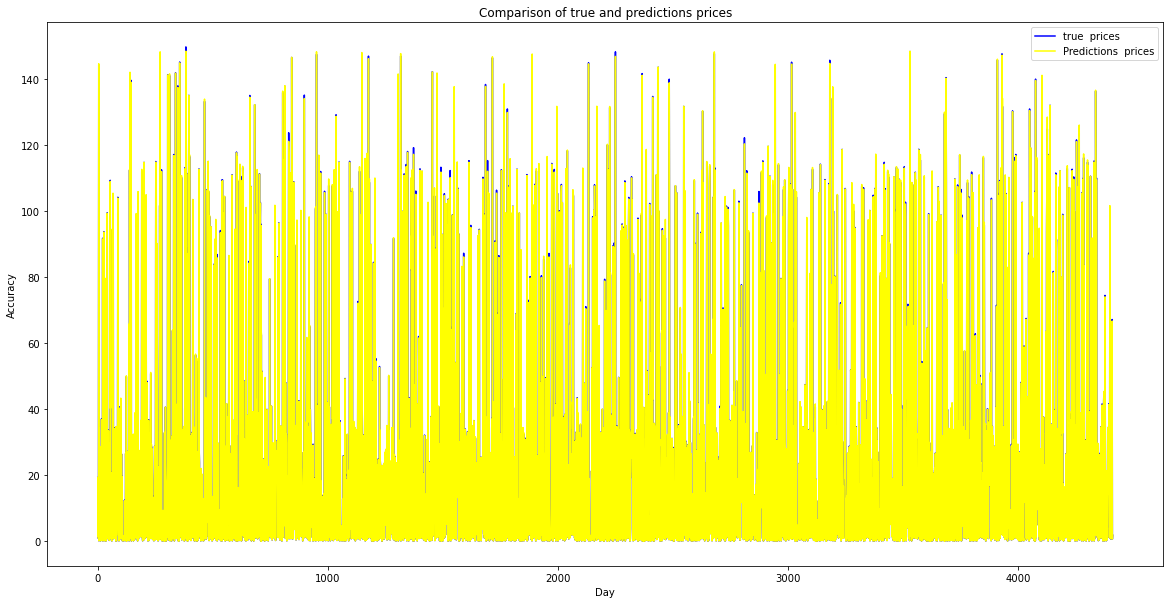

In [42]:
pred=rf.predict(X_test)
comparison=pd.DataFrame()
comparison['true_prices']=y_test
comparison['predicted_prices']=pred

plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(comparison.true_prices.values,color='blue',label='true  prices')
plt.plot(comparison.predicted_prices.values,color='yellow',label='Predictions  prices')

plt.title('Comparison of true and predictions prices')
plt.xlabel('Day')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### As we can see, the predictions are very close to the true prices of CLOSE. The Model is performing very good.

# First 60 records of comparison 

In [43]:
comparison.head(60)

,true_prices,predicted_prices
0,1.045587,1.045481
1,19.442270,19.471703
2,1.405249,1.403243
3,144.330002,144.580886
4,0.121707,0.121517
5,34.150002,34.219168
6,0.981362,0.975305
7,27.483273,27.227977
8,13.728791,13.740785
9,1.168900,1.159200


# Prediction vs True prices and their diffrence from true to prediction prices 

In [44]:
comparison['Diffrence']=y_test-pred
comparison.head(60)

,true_prices,predicted_prices,Diffrence
0,1.045587,1.045481,0.000106
1,19.442270,19.471703,-0.029432
2,1.405249,1.403243,0.002005
3,144.330002,144.580886,-0.250884
4,0.121707,0.121517,0.000190
5,34.150002,34.219168,-0.069167
6,0.981362,0.975305,0.006057
7,27.483273,27.227977,0.255296
8,13.728791,13.740785,-0.011994
9,1.168900,1.159200,0.009700


# Predicted prices are close with the true prices and that good!!

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# preparing the data for the best model of Random Forest Regression and will predict the next 7 days predictions. 

In [45]:
data['times'] = pd.to_datetime(data['Date'])  
data.set_index('times', inplace=True)                   
data.sort_index(ascending=True, inplace=True)
tar='Forecast Predictions'
data.rename(columns={'Close':tar}, inplace=True)
data=data[[tar]]

In [46]:
def create_features(data, label=None):
    data['date'] = data.index
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofmonth'] = data['date'].dt.day
    X = data[['month','year','dayofmonth']]
    if label:
        y = data[label]
        return X, y
    return X

In [47]:
test=data.copy()
X= create_features(test)
y=data

# As we got that Random Forest Regression Algorithm performing good so now we are going to train model on all data and then will predict the next 7 days predictions

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='mse', n_estimators=100, min_samples_split=2, min_samples_leaf=2, n_jobs=None)
rf.fit(X, y)

RandomForestRegressor(min_samples_leaf=2)

# Forecasting function by using the trained model for predictions

In [49]:
frequency='D'
t=datetime.now()
def forecast(number):
  datelist = pd.date_range(t, periods=number,freq=frequency)
  datelist= pd.DataFrame(datelist,columns=['TIMESTAMP'])
  datelist.index = datelist['TIMESTAMP']
  datelist_featured=create_features(datelist)
  prediction=rf.predict(datelist_featured)
  pred=pd.DataFrame(prediction,columns=data.columns)
  pred.index = datelist['TIMESTAMP']
  return pred

# Predictions of next 7 days

In [50]:
forecast=forecast(7)
forecast

,Forecast Predictions
TIMESTAMP,
2020-09-07 21:04:14.884368,125.371037
2020-09-08 21:04:14.884368,125.342338
2020-09-09 21:04:14.884368,125.281578
2020-09-10 21:04:14.884368,125.150044
2020-09-11 21:04:14.884368,125.064274
2020-09-12 21:04:14.884368,125.072541
2020-09-13 21:04:14.884368,125.103641


# Graph of the next 7 days predictions 

<AxesSubplot:xlabel='TIMESTAMP'>

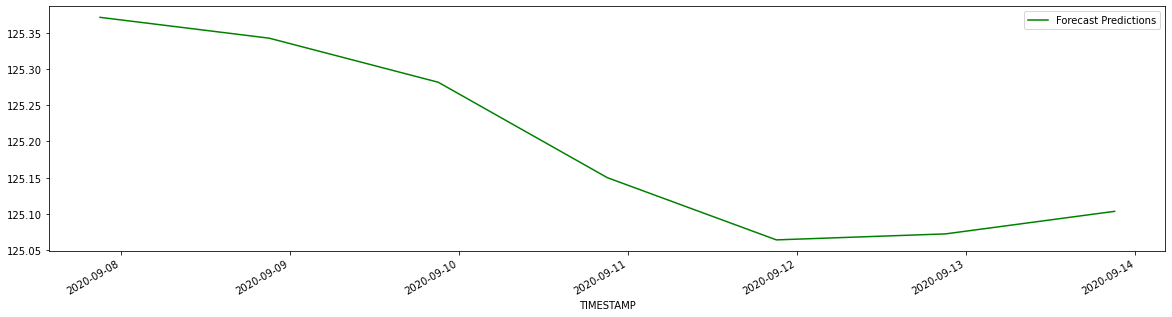

In [51]:
forecast.plot(figsize=(20, 5), color='g')